In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
#OpenWeather Key
api_key = weather_api
units = "imperial"

query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# Print the city count to confirm sufficient count
len(cities)

607

In [3]:
#Empty lists for my variables
cloudiness = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
country = []
city_column = []

count = 0
sets = 1

In [4]:
#cities


In [5]:
#Run the API call for each city
print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    if count < 50:
            count += 1
    else:
            sets += 1
            count = 0
    print(f"Processing Record {count} of Set {sets} | {city}")
    try:
        weather_json = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(weather_json['clouds']['all'])
        country.append(weather_json['sys']['country'])
        date.append(weather_json['dt'])
        humidity.append(weather_json['main']['humidity'])
        max_temp.append(weather_json['main']['temp_max'])
        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        wind_speed.append(weather_json['wind']['speed'])
        city_column.append(city)
    except:
        print('City not found. Skipping...')
    pass
print('------------------------------')
print('Data Retrieval Complete')
print('------------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | vostok
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | kyra
Processing Record 6 of Set 1 | camacha
Processing Record 7 of Set 1 | taltal
Processing Record 8 of Set 1 | port keats
Processing Record 9 of Set 1 | mizdah
Processing Record 10 of Set 1 | yumen
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | coihaique
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | dingle
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | george town
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | inhapi
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | baykit
Processing Record 22 of Set 1 | tuktoyaktuk
Processing Record 23 of Set 1 | kissamos
Processing Record 24 of Set 1 | bandarbe

Processing Record 37 of Set 4 | leningradskiy
Processing Record 38 of Set 4 | ilhabela
Processing Record 39 of Set 4 | ostrovnoy
Processing Record 40 of Set 4 | mahebourg
Processing Record 41 of Set 4 | toliary
City not found. Skipping...
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | tigil
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | challapata
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | port hedland
Processing Record 48 of Set 4 | waingapu
Processing Record 49 of Set 4 | havoysund
Processing Record 50 of Set 4 | cortes
Processing Record 0 of Set 5 | katsuura
Processing Record 1 of Set 5 | acapulco
Processing Record 2 of Set 5 | qaanaaq
Processing Record 3 of Set 5 | fairbanks
Processing Record 4 of Set 5 | tondano
Processing Record 5 of Set 5 | fare
Processing Record 6 of Set 5 | bilibino
Processing Record 7 of Set 5 | chuy
Processing Record 8 of Set 5 | gejiu
Processing Record 9 of Set 5 | seydi
Proce

Processing Record 17 of Set 8 | kuruman
Processing Record 18 of Set 8 | mantua
Processing Record 19 of Set 8 | karratha
Processing Record 20 of Set 8 | arlit
Processing Record 21 of Set 8 | armidale
Processing Record 22 of Set 8 | taoudenni
Processing Record 23 of Set 8 | luocheng
Processing Record 24 of Set 8 | pauini
Processing Record 25 of Set 8 | blonay
Processing Record 26 of Set 8 | zhanatas
City not found. Skipping...
Processing Record 27 of Set 8 | todos santos
City not found. Skipping...
Processing Record 28 of Set 8 | vila velha
Processing Record 29 of Set 8 | takoradi
Processing Record 30 of Set 8 | kendari
Processing Record 31 of Set 8 | griffith
Processing Record 32 of Set 8 | oranjemund
Processing Record 33 of Set 8 | prince rupert
Processing Record 34 of Set 8 | troitsk
Processing Record 35 of Set 8 | balkhash
Processing Record 36 of Set 8 | borlange
City not found. Skipping...
Processing Record 37 of Set 8 | port hardy
Processing Record 38 of Set 8 | changji
Processing 

Processing Record 48 of Set 11 | hopelchen
Processing Record 49 of Set 11 | cotonou
Processing Record 50 of Set 11 | arona
Processing Record 0 of Set 12 | banda aceh
Processing Record 1 of Set 12 | perris
Processing Record 2 of Set 12 | mabua
Processing Record 3 of Set 12 | eslamshahr
Processing Record 4 of Set 12 | asau
Processing Record 5 of Set 12 | rundu
Processing Record 6 of Set 12 | urusha
Processing Record 7 of Set 12 | bay roberts
Processing Record 8 of Set 12 | de aar
City not found. Skipping...
Processing Record 9 of Set 12 | flinders
Processing Record 10 of Set 12 | bobo dioulasso
Processing Record 11 of Set 12 | birjand
Processing Record 12 of Set 12 | cockburn harbour
Processing Record 13 of Set 12 | leogane
Processing Record 14 of Set 12 | imeni poliny osipenko
Processing Record 15 of Set 12 | merrill
Processing Record 16 of Set 12 | kerema
Processing Record 17 of Set 12 | tjome
Processing Record 18 of Set 12 | nzega
Processing Record 19 of Set 12 | andevoranto
City not 

In [6]:
#create new dataframe using new columns
cities_dict={"City":city_column,
             "Cloudiness":cloudiness,
             "Country":country,
             "Date":date,
             "Humidity":humidity,
             "Latitude":lat,
             "Longitude":lng,
             "Max Temp":max_temp,
             "Wind Speed":wind_speed}

In [12]:
weather_df = pd.DataFrame(cities_dict)
weather_df.head(5)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,kapaa,90,US,1595976345,74,22.08,-159.32,82.40,20.80
1,kodiak,1,US,1595976137,52,57.79,-152.41,68.00,5.82
2,vostok,16,RU,1595976345,89,46.49,135.88,70.32,2.28
3,hermanus,2,ZA,1595976345,94,-34.42,19.23,44.01,5.30
4,kyra,95,RU,1595976345,88,49.58,111.98,61.16,1.97


In [14]:
weather_df.to_csv("weather_csv")

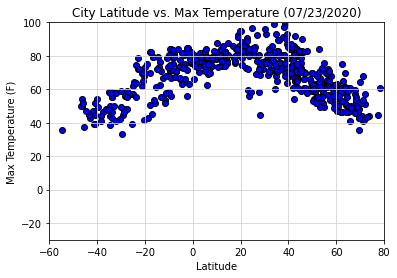

In [16]:
plt.scatter(weather_df["Latitude"],weather_df["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature (07/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.xlim(-60,80)
plt.ylim(-30,100)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("Figures/fig1.png")
plt.show()

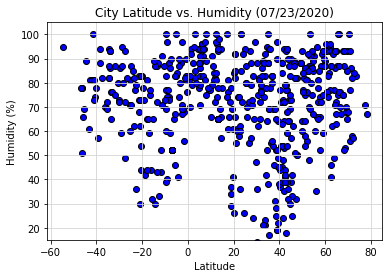

In [17]:
plt.scatter(weather_df["Latitude"],weather_df["Humidity"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Humidity (07/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("Figures/fig2.png")
plt.show()

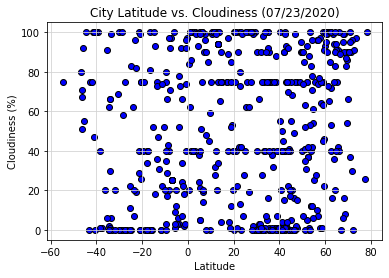

In [18]:
plt.scatter(weather_df["Latitude"],weather_df["Cloudiness"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Cloudiness (07/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("Figures/fig3.png")
plt.show()

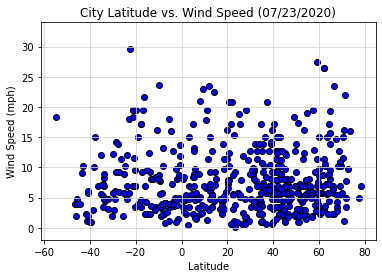

In [19]:
plt.scatter(weather_df["Latitude"],weather_df["Wind Speed"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Wind Speed (07/23/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
#plt.savefig("Figures/fig4.png")
plt.show()